This notebook is for experimenting different Neural Network architecture on product category classification problem

In [1]:
SEED = 123
PROJECT_PATH = ".."
from product_matcher.utils import get_config
from product_matcher.utils import loader, load_data
import os


cfg = get_config(overrides=['experiments=problem1/neuralnet'])
train, test, X_train, Y_train, X_test, Y_test = load_data(cfg, PROJECT_PATH)


2023-02-12 02:01:08.660172: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
import tensorflow as tf
from hydra.utils import instantiate

Create Experiments

In [3]:
param = {
    "units": cfg['experiments']['model']['units'], 
    "activation": cfg['experiments']['model']['activation']
}

In [4]:
from product_matcher.utils import create_nn_experiments
experiments = create_nn_experiments(param, X_train.shape[1], SEED)

2023-02-12 02:01:18.130672: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


## Prep data

In [5]:
from sklearn.model_selection import train_test_split
x, x_val, y, y_val = train_test_split(X_train[:80000], Y_train[:80000], test_size = 8000, random_state=SEED)

In [6]:
import tensorflow as tf
x = tf.convert_to_tensor(x.todense())
x_val = tf.convert_to_tensor(x_val.todense())

# Experiments

In [7]:
import tensorflow as tf
from tensorflow.keras.metrics import BinaryAccuracy, Precision, Recall
from product_matcher.utils import timecallback, get_f1

In [8]:
import importlib
import product_matcher.utils
importlib.reload(product_matcher.utils)
from product_matcher.utils import timecallback, get_f1

In [9]:
from product_matcher.utils import timecallback

In [11]:
report = []
for setup in experiments:
    print(f"layer: {setup['layer']} activation: {setup['activation']}")
    result = setup.copy()
    for idx in range(4):
        print(f"units: {setup['model_units'][idx]}")
        model = setup['models'][idx]
        print(model.summary())
        # setup callbacks
        earystop = tf.keras.callbacks.EarlyStopping(monitor='val_binary_accuracy', patience=3)
        timer = timecallback()
        # model compile
        model.compile(loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
                     optimizer = "adam", 
                     metrics = ["BinaryAccuracy", "Precision", "Recall"]
                     )

        history = model.fit(
            x=x, 
            y=y, 
            batch_size=24, 
            validation_data=(x_val, y_val), 
            epochs = 10, 
            callbacks=[earystop, timer])

        # getting summary()
        history_dict = history.history
        history_dict["training_time"] = timer.training_time
        result[f'model{idx}'] = history_dict
        print("++"*12)
    report.append(result)

        
            
            

layer: dense activation: relu
units: 16
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 16)                367472    
                                                                 
 dense_4 (Dense)             (None, 1)                 17        
                                                                 
Total params: 367,489
Trainable params: 367,489
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/10
3000/3000 [==============================] - 17s 5ms/step - loss: 0.2131 - binary_accuracy: 0.9222 - precision: 0.9557 - recall: 0.8755 - val_loss: 0.1340 - val_binary_accuracy: 0.9549 - val_precision: 0.9676 - val_recall: 0.9369
Epoch 2/10
3000/3000 [==============================] - 17s 6ms/step - loss: 0.1130 - binary_accuracy: 0.9613 - precision: 0.9676 - recall: 0.9498 - val_loss: 0

None
Epoch 1/10
3000/3000 [==============================] - 249s 83ms/step - loss: 0.1479 - binary_accuracy: 0.9431 - precision: 0.9572 - recall: 0.9205 - val_loss: 0.1180 - val_binary_accuracy: 0.9594 - val_precision: 0.9681 - val_recall: 0.9461
Epoch 2/10
3000/3000 [==============================] - 229s 76ms/step - loss: 0.0856 - binary_accuracy: 0.9709 - precision: 0.9708 - recall: 0.9675 - val_loss: 0.1216 - val_binary_accuracy: 0.9606 - val_precision: 0.9710 - val_recall: 0.9458
Epoch 3/10
3000/3000 [==============================] - 235s 78ms/step - loss: 0.0675 - binary_accuracy: 0.9781 - precision: 0.9779 - recall: 0.9756 - val_loss: 0.1250 - val_binary_accuracy: 0.9619 - val_precision: 0.9693 - val_recall: 0.9502
Epoch 4/10
3000/3000 [==============================] - 254s 85ms/step - loss: 0.0555 - binary_accuracy: 0.9820 - precision: 0.9819 - recall: 0.9799 - val_loss: 0.1367 - val_binary_accuracy: 0.9638 - val_precision: 0.9664 - val_recall: 0.9573
Epoch 5/10
3000/3000 [=

Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/10
3000/3000 [==============================] - 206s 68ms/step - loss: 0.1501 - binary_accuracy: 0.9441 - precision: 0.9580 - recall: 0.9218 - val_loss: 0.1249 - val_binary_accuracy: 0.9610 - val_precision: 0.9633 - val_recall: 0.9547
Epoch 2/10
3000/3000 [==============================] - 203s 68ms/step - loss: 0.0955 - binary_accuracy: 0.9677 - precision: 0.9693 - recall: 0.9621 - val_loss: 0.1265 - val_binary_accuracy: 0.9590 - val_precision: 0.9580 - val_recall: 0.9560
Epoch 3/10
3000/3000 [==============================] - 208s 69ms/step - loss: 0.0822 - binary_accuracy: 0.9725 - precision: 0.9735 - recall: 0.9679 - val_loss: 0.1269 - val_binary_accuracy: 0.9572 - val_precision: 0.9637 - val_recall: 0.9461
Epoch 4/10
3000/3000 [==============================] - 205s 68ms/step - loss: 0.0751 - binary_accuracy: 0.9751 - precision: 0.9762 - recall: 0.9708 - val_loss: 0.1312 - val_bi

In [18]:
cfg['artifacts']['hyperparameter_study']['name']

'artifacts/problem1/neuralnet_hyperparameter_study.pickle'

In [20]:
len(report)

6

In [15]:
print(cfg['artifacts']['hyperparameter_study']['name'])

In [22]:
import pickle

In [24]:
pickle.dump(report, open(os.path.join(PROJECT_PATH, cfg['artifacts']['hyperparameter_study']['name']), "wb"))

Keras weights file (<HDF5 file "variables.h5" (mode r+)>) saving:
...layers
......dense
.........vars
............0
............1
......dense_1
.........vars
............0
............1
...metrics
......binary_accuracy
.........vars
............0
............1
......mean
.........vars
............0
............1
......precision
.........vars
............0
............1
......recall
.........vars
............0
............1
...optimizer
......vars
.........0
.........1
.........2
.........3
.........4
.........5
.........6
.........7
.........8
...vars
Keras model archive saving:
File Name                                             Modified             Size
config.json                                    2023-02-12 09:15:33         1613
metadata.json                                  2023-02-12 09:15:33           64
variables.h5                                   2023-02-12 09:15:33      4436224
Keras weights file (<HDF5 file "variables.h5" (mode r+)>) saving:
...layers
......dense
......

Keras model archive saving:
File Name                                             Modified             Size
config.json                                    2023-02-12 09:15:37         1623
metadata.json                                  2023-02-12 09:15:37           64
variables.h5                                   2023-02-12 09:15:37     17664640
Keras weights file (<HDF5 file "variables.h5" (mode r+)>) saving:
...layers
......dense
.........vars
............0
............1
......dense_1
.........vars
............0
............1
...metrics
......binary_accuracy
.........vars
............0
............1
......mean
.........vars
............0
............1
......precision
.........vars
............0
............1
......recall
.........vars
............0
............1
...optimizer
......vars
.........0
.........1
.........2
.........3
.........4
.........5
.........6
.........7
.........8
...vars
Keras model archive saving:
File Name                                             Modified    

File Name                                             Modified             Size
config.json                                    2023-02-12 09:15:40         1768
metadata.json                                  2023-02-12 09:15:40           64
variables.h5                                   2023-02-12 09:15:40     35306312
Keras weights file (<HDF5 file "variables.h5" (mode r+)>) saving:
...layers
......dense
.........vars
............0
............1
......dense_1
.........vars
............0
............1
......dropout
.........vars
...metrics
......binary_accuracy
.........vars
............0
............1
......mean
.........vars
............0
............1
......precision
.........vars
............0
............1
......recall
.........vars
............0
............1
...optimizer
......vars
.........0
.........1
.........2
.........3
.........4
.........5
.........6
.........7
.........8
...vars
Keras model archive saving:
File Name                                             Modified    

## Report analysis

In [30]:
from product_matcher.utils import loader
_report = loader(os.path.join(PROJECT_PATH, cfg['artifacts']['hyperparameter_study']['name']), 'pickle')

Keras model archive loading:
File Name                                             Modified             Size
config.json                                    2023-02-12 09:15:32         1613
metadata.json                                  2023-02-12 09:15:32           64
variables.h5                                   2023-02-12 09:15:32      4436224
Keras weights file (<HDF5 file "variables.h5" (mode r)>) loading:
...layers
......dense
.........vars
............0
............1
......dense_1
.........vars
............0
............1
...metrics
......binary_accuracy
.........vars
............0
............1
......mean
.........vars
............0
............1
......precision
.........vars
............0
............1
......recall
.........vars
............0
............1
...optimizer
......vars
.........0
.........1
.........2
.........3
.........4
.........5
.........6
.........7
.........8
...vars
Keras model archive loading:
File Name                                             Modified  

config.json                                    2023-02-12 09:15:36         1623
metadata.json                                  2023-02-12 09:15:36           64
variables.h5                                   2023-02-12 09:15:36     17664640
Keras weights file (<HDF5 file "variables.h5" (mode r)>) loading:
...layers
......dense
.........vars
............0
............1
......dense_1
.........vars
............0
............1
...metrics
......binary_accuracy
.........vars
............0
............1
......mean
.........vars
............0
............1
......precision
.........vars
............0
............1
......recall
.........vars
............0
............1
...optimizer
......vars
.........0
.........1
.........2
.........3
.........4
.........5
.........6
.........7
.........8
...vars
Keras model archive loading:
File Name                                             Modified             Size
config.json                                    2023-02-12 09:15:36         1624
metadata.json

Keras model archive loading:
File Name                                             Modified             Size
config.json                                    2023-02-12 09:15:40         1768
metadata.json                                  2023-02-12 09:15:40           64
variables.h5                                   2023-02-12 09:15:40     35306312
Keras weights file (<HDF5 file "variables.h5" (mode r)>) loading:
...layers
......dense
.........vars
............0
............1
......dense_1
.........vars
............0
............1
......dropout
.........vars
...metrics
......binary_accuracy
.........vars
............0
............1
......mean
.........vars
............0
............1
......precision
.........vars
............0
............1
......recall
.........vars
............0
............1
...optimizer
......vars
.........0
.........1
.........2
.........3
.........4
.........5
.........6
.........7
.........8
...vars
Keras model archive loading:
File Name                           

In [ ]:
from product_matcher.utils import get_f1

In [64]:
import pandas as pd
import numpy as np
df_history = []
for r in _report:
    for i in range(4):
        d = pd.DataFrame(r[f'model{i}'])
        d['layer'] = r['layer']
        d['activation'] = r['activation']
        d['units'] = r['model_units'][i]
        d['epochs'] = np.arange(1,len(d)+1)
        d['f1'] = get_f1(d['precision'].values,d['recall'].values)
        df_history.append(d)
        d['final_accuracy'] = d['binary_accuracy'].values[-1]
        d['final_accuracy_val'] = d['val_binary_accuracy'].values[-1]
df_history = pd.concat(df_history, ignore_index=True)

Report table

In [65]:
df1 = df_history.loc[df_history.layer=='dense'].reset_index()

In [66]:
df1 = pd.pivot_table(df1[['training_time', 'layer', 'activation', 'units', 'final_accuracy', 'final_accuracy_val']].drop_duplicates(),
              values=['training_time', 'final_accuracy', 'final_accuracy_val'],
              columns=['activation'],
              index='units')



In [74]:
print(df1.to_latex(
    float_format="%.4f",
    caption='Feed-forward model without dropout accuracy on training and validation date, training time in seconds'))

\begin{table}
\centering
\caption{Feed-forward model without dropout accuracy on training and validation date, training time in seconds}
\begin{tabular}{lrrrrrrrrr}
\toprule
{} & \multicolumn{3}{l}{final\_accuracy} & \multicolumn{3}{l}{final\_accuracy\_val} & \multicolumn{3}{l}{training\_time} \\
activation &         linear &   relu &   selu &             linear &   relu &   selu &        linear &      relu &     selu \\
units &                &        &        &                    &        &        &               &           &          \\
\midrule
16    &         0.9750 & 0.9825 & 0.9741 &             0.9591 & 0.9570 & 0.9560 &       87.6604 &  187.2821 &  75.1710 \\
64    &         0.9768 & 0.9813 & 0.9761 &             0.9529 & 0.9619 & 0.9557 &      380.1457 &  297.3382 & 274.6048 \\
128   &         0.9753 & 0.9880 & 0.9773 &             0.9523 & 0.9616 & 0.9561 &      536.3535 &  994.0371 & 620.7686 \\
256   &         0.9739 & 0.9886 & 0.9751 &             0.9555 & 0.9609 & 0.958

/var/folders/f9/35q1dxg13mqbmm0r53w0ymsm0000gp/T/ipykernel_69430/3154722778.py:1: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  print(df1.to_latex(


In [68]:
df2 = df_history.loc[df_history.layer=='dense_dropout'].reset_index()
df2 = pd.pivot_table(df2[['training_time', 'layer', 'activation', 'units', 'final_accuracy', 'final_accuracy_val']].drop_duplicates(),
              values=['training_time', 'final_accuracy', 'final_accuracy_val'],
              columns=['activation'],
              index='units')




In [73]:
print(df2.to_latex(
    float_format="%.4f",
    caption='Feed-forward model with dropout layer accuracy on training and validation date, training time in seconds'))



\begin{table}
\centering
\caption{Feed-forward model with dropout layer accuracy on training and validation date, training time in seconds}
\begin{tabular}{lrrrrrrrrr}
\toprule
{} & \multicolumn{3}{l}{final\_accuracy} & \multicolumn{3}{l}{final\_accuracy\_val} & \multicolumn{3}{l}{training\_time} \\
activation &         linear &   relu &   selu &             linear &   relu &   selu &        linear &     relu &      selu \\
units &                &        &        &                    &        &        &               &          &           \\
\midrule
16    &         0.9767 & 0.9806 & 0.9768 &             0.9570 & 0.9594 & 0.9544 &       64.5063 & 107.8643 &   81.5648 \\
64    &         0.9780 & 0.9836 & 0.9782 &             0.9546 & 0.9595 & 0.9554 &      205.1199 & 207.9711 &  205.0539 \\
128   &         0.9773 & 0.9886 & 0.9787 &             0.9545 & 0.9589 & 0.9528 &      401.4288 & 416.7079 &  401.8973 \\
256   &         0.9773 & 0.9902 & 0.9787 &             0.9548 & 0.9599 & 0.

/var/folders/f9/35q1dxg13mqbmm0r53w0ymsm0000gp/T/ipykernel_69430/1625686885.py:1: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  print(df2.to_latex(


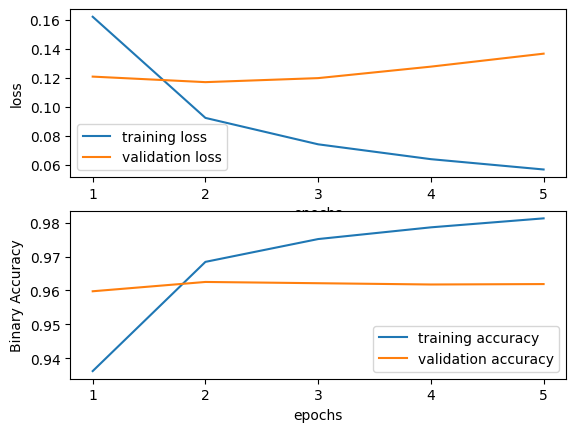

In [113]:
import matplotlib.pyplot as plt


plt.subplot(2,1,1)
plt.plot(
    df_history.loc[(df_history.layer=='dense')&(df_history.activation=='relu')&(df_history.units==64), ['epochs']].values,
    df_history.loc[(df_history.layer=='dense')&(df_history.activation=='relu')&(df_history.units==64), ['loss', 'val_loss']],
)
plt.xticks([1,2,3,4,5])
plt.xlabel("epochs")
plt.ylabel("loss")
plt.legend(["training loss", 'validation loss'])

plt.subplot(2,1,2, )
plt.plot(
    df_history.loc[(df_history.layer=='dense')&(df_history.activation=='relu')&(df_history.units==64), ['epochs']].values,
    df_history.loc[(df_history.layer=='dense')&(df_history.activation=='relu')&(df_history.units==64), ['binary_accuracy', 'val_binary_accuracy']]
)
plt.xticks([1,2,3,4,5])
plt.xlabel("epochs")
plt.ylabel("Binary Accuracy")
plt.legend(["training accuracy", 'validation accuracy'])






<AxesSubplot: >

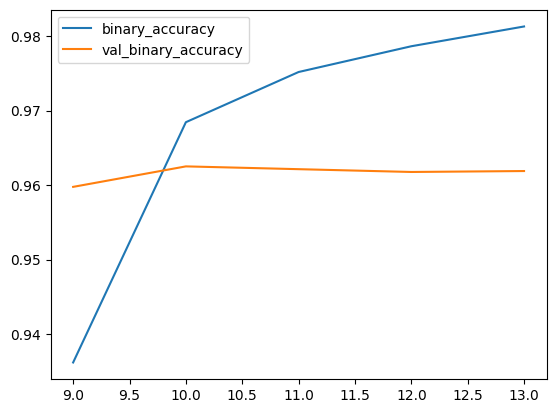

In [79]:
df_history.loc[(df_history.layer=='dense')&(df_history.activation=='relu')&(df_history.units==64), ['binary_acculracy', 'val_binary_accuracy']].plot()



## Analysis1
    Number of layers with different activation